# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*
Data Validation: This was done by;
	-Checking for data types. 
	-Checking for missing values.
    -Dropped rows with 52 missing values as they can be considered irrelevant to our analysis. Removing 'as a snack' description from servings column.
    -Encoding 'High_traffic' field into 1 and 0; where 1 is 'High' and 0 for 'NaN' and creating a new field 'High_traffic_hl' with these values.
    -Checked the distribution of labels.
    -y_train showed the data was slightly imbalanced, with a 60:40 ratio.


Exploratory Data Analysis(EDA): This was done by;
	-Performing a preliminary analysis of the data to gain insights into the relationships between variables, and the distribution of data.
    -Use visualizations like histograms, heat map and bar plots to help understand the data better.
    -I used Correlation matrix to show the correlation between all pairs of columns in the dataframe, where values close to 1 indicate strong positive correlation and values close to -1 indicate strong negative correlation.
    -The resulting matrix was visualised in a heatmap.
    -The map showed that there was the strongest correlation between carbohydrate foods and high traffic compared to the food categories.
    -Recipes containing sugar had the least correlation to the high traffic, when compared to the other food categories.
    -The histograms show the recipes positively right skewed on the graph in terms of calories, carbohydrate, protein and sugar.
    -The bar plot shows the frequency of other features as with high traffic; with potato and vegetables respectively as the most frequent food categories in the dataset , and beverages as the least frequent food category.
    -It also shows 4 servings recipes as the most frequent recipe in the dataset, and most of the recipes had high traffic.


Model Development: I used 'sklearn' packages like;
    -Converted categorical variables to numerical variables using '.get_dummy' function.
    -Chose relevant columns and defined the features and target variable.
    -Split the data into training and testing sets using train_test_split method.
    -Defined the models; This is a binary classification problem, where the objective is to predict if a recipe will lead to high traffic or not...
    -logistic regression as baseline model
    -decision tree as a comparison model
    -random forest(as a comparison model to combine multiple decision trees to improve the model's performance and reduce overfitting)
    
    
Model Evaluation:
	-Evaluated the models using accuracy score, precision score, recall score, F1-score on the classification table.
	-The baseline (Logistic Regression) model had the highest accuracy score, with 77% accuracy.. the Random Forest comparison model had the second highest with 72%..
    -Therefore, the Logistic Regression model outperformed the comparison models.
    -The accuracy of the baseline model was improved  through hyperparameter tuning to 80.47% accuracy.
    -Best combination of hyperparameters that produced the best score were:  {'C': 0.6, 'max_iter': 7, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
    
    
Final Summary and Recommendations:
	-The Exploratory analysis done on the dataset showed that recipes containing; potatoes, vegetables, and pork are at the top of food categories with high traffic.
    -It also showed that recipes with 4 servings, had the most frequency of high traffic.
    -The company can prioritize on the above food categories and recipes with 4 servings when selecting recipes to promote on the website.
    -The Logistic Regression outperformed the comparison models in predicting if a recipe will pull high traffic or not.
    -Therefore, it is recommended that the business uses the Logistic Regression model to prioritize which recipes to promote on the website.
    -The business should monitor the accuracy score to ensure the model's performance is optimized.
    -It is recommended to collect more data to improve the model's accuracy further and to explore other models or techniques that may further improve the performance.

In [806]:
# Start coding here...

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [807]:
#Data Validation
import pandas as pd
import numpy as np

#import dataset
data = pd.read_csv("recipe_site_traffic_2212.csv")

#assign imported data to 'df'
df = pd.DataFrame(data)

In [808]:
#view dataset information type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [809]:
#view shape of dataset
df.shape

(947, 8)

In [810]:
#check dataset columns
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [811]:
#view top rows
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [812]:
#check for null values
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [813]:
#remove the attached 'as a snack' description from servings column
df['servings'] = df['servings'].apply(lambda x: x[:-11] if 'as a snack' in x else x)

df['servings'] = df['servings'].astype(float)

#dropna in columns with 52 missing values
df_cleaner = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])

#view shape of dataset
df_cleaner.shape

(895, 8)

In [814]:
#check for null values
df_cleaner.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64

In [815]:
#fillna in 'high_traffic' column by replace values with 1 and 0
#where high = 1 and nan = 0; and place in a new column 'high_traffic_hl'
df_cleaner["high_traffic_hl"] = df_cleaner["high_traffic"].apply(lambda x: 1 if x == 'High' else 0)

In [816]:
#check for null values
df_cleaner.isnull().sum()

recipe               0
calories             0
carbohydrate         0
sugar                0
protein              0
category             0
servings             0
high_traffic       360
high_traffic_hl      0
dtype: int64

In [817]:
#drop high_traffic column
df_cleaned = df_cleaner.drop(["high_traffic"], axis=1)

#view top rows
df_cleaned.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic_hl
1,2,35.48,38.56,0.66,0.92,Potato,4.0,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1.0,0
3,4,97.03,30.56,38.63,0.02,Beverages,4.0,1
4,5,27.05,1.85,0.80,0.53,Beverages,4.0,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2.0,1


In [818]:
#check for null values
df_cleaned.isna().sum()

recipe             0
calories           0
carbohydrate       0
sugar              0
protein            0
category           0
servings           0
high_traffic_hl    0
dtype: int64

In [819]:
df_cleaned.describe()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic_hl
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101,0.597765
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979,0.490623
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000,0.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000,1.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000,1.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000,1.000000


In [820]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe           895 non-null    int64  
 1   calories         895 non-null    float64
 2   carbohydrate     895 non-null    float64
 3   sugar            895 non-null    float64
 4   protein          895 non-null    float64
 5   category         895 non-null    object 
 6   servings         895 non-null    float64
 7   high_traffic_hl  895 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.9+ KB


In [821]:
#Exploratory Analysis
import matplotlib.pyplot as plt
import seaborn as sns

Graph for calories: Total - 533


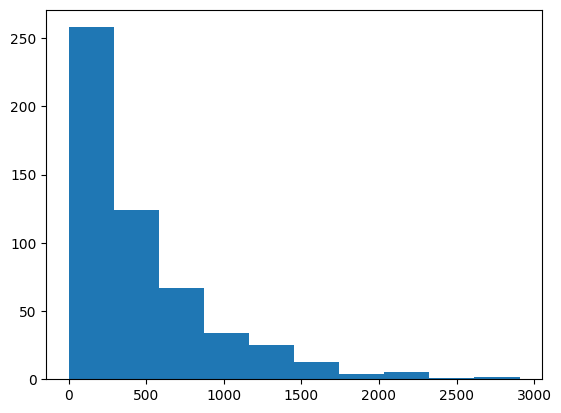

Graph for carbohydrate: Total - 512


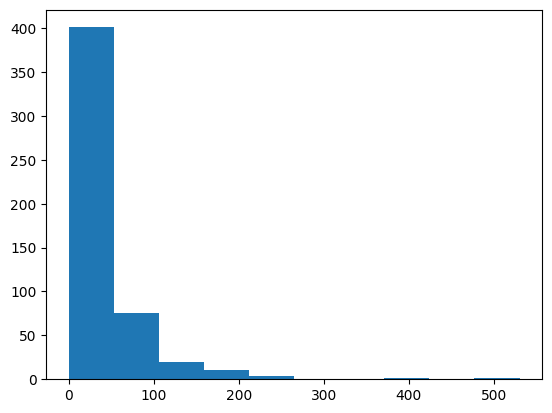

Graph for protein: Total - 501


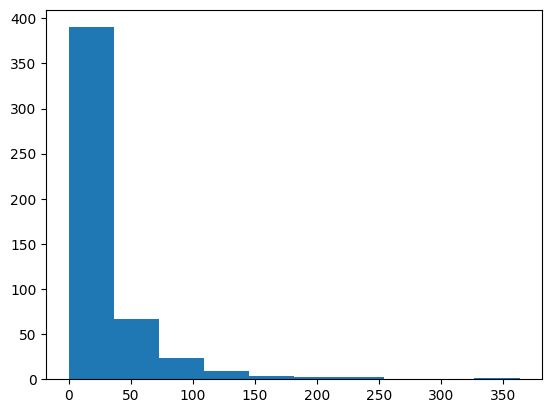

Graph for sugar: Total - 431


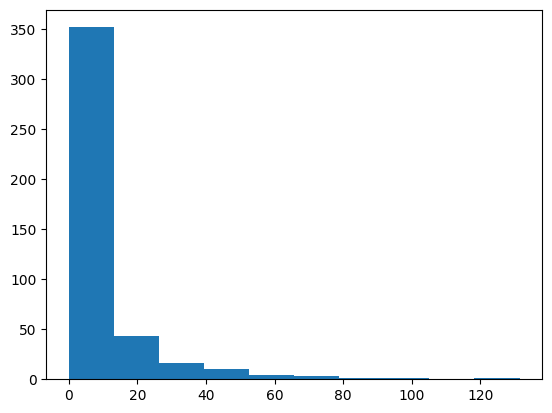

In [822]:
df_cleaned_cat2 = df_cleaned[['calories', 'carbohydrate', 'protein', 'sugar', 'high_traffic_hl']]

#loop a histogram for df_cleaned_cat2 calories, carbohydrate, protein and sugar columns that have high traffic
for i in df_cleaned_cat2.columns:
    if i != 'high_traffic_hl' and df_cleaned_cat2['high_traffic_hl'].sum() > 0:
        column_num = df_cleaned_cat2[df_cleaned_cat2['high_traffic_hl'] == 1][i].value_counts()
        if len(column_num) > 0:
            print("Graph for %s: Total - %d" %(i, len(column_num)))
            chart = plt.hist(x=column_num.index)
            plt.show()

Graph for category: Total - 11


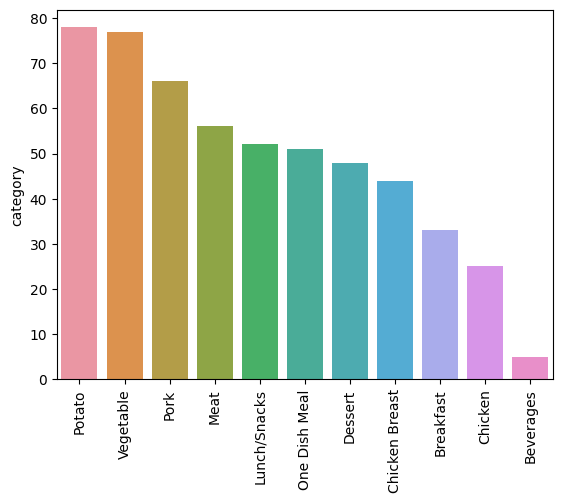

Graph for servings: Total - 4


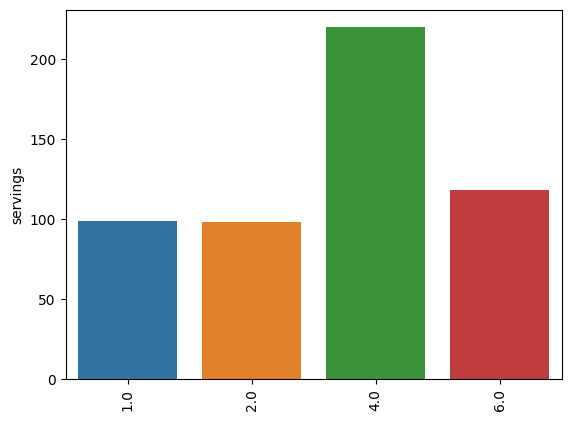

In [823]:
df_cleaned_cat = df_cleaned[['category', 'servings', 'high_traffic_hl']]

#loop a barchart for df_cleaned_cat categories and servings columns that have high traffic
for i in df_cleaned_cat.columns:
    if i != 'high_traffic_hl' and df_cleaned_cat['high_traffic_hl'].sum() > 0:
        column_num = df_cleaned_cat[df_cleaned_cat['high_traffic_hl'] == 1][i].value_counts()
        if len(column_num) > 0:
            print("Graph for %s: Total - %d" %(i, len(column_num)))
            chart = sns.barplot(x=column_num.index, y=column_num)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
            plt.show()

In [824]:
#calculate the correlation matrix
Correlation_matrix = df_cleaned.corr()

print(Correlation_matrix)

                   recipe  calories  ...  servings  high_traffic_hl
recipe           1.000000  0.012920  ...  0.025526         0.026989
calories         0.012920  1.000000  ... -0.034756         0.074382
carbohydrate     0.044743 -0.028970  ... -0.017895         0.080932
sugar           -0.027489 -0.097302  ... -0.008617        -0.075527
protein         -0.058767  0.172477  ... -0.017926         0.044575
servings         0.025526 -0.034756  ...  1.000000         0.043229
high_traffic_hl  0.026989  0.074382  ...  0.043229         1.000000

[7 rows x 7 columns]


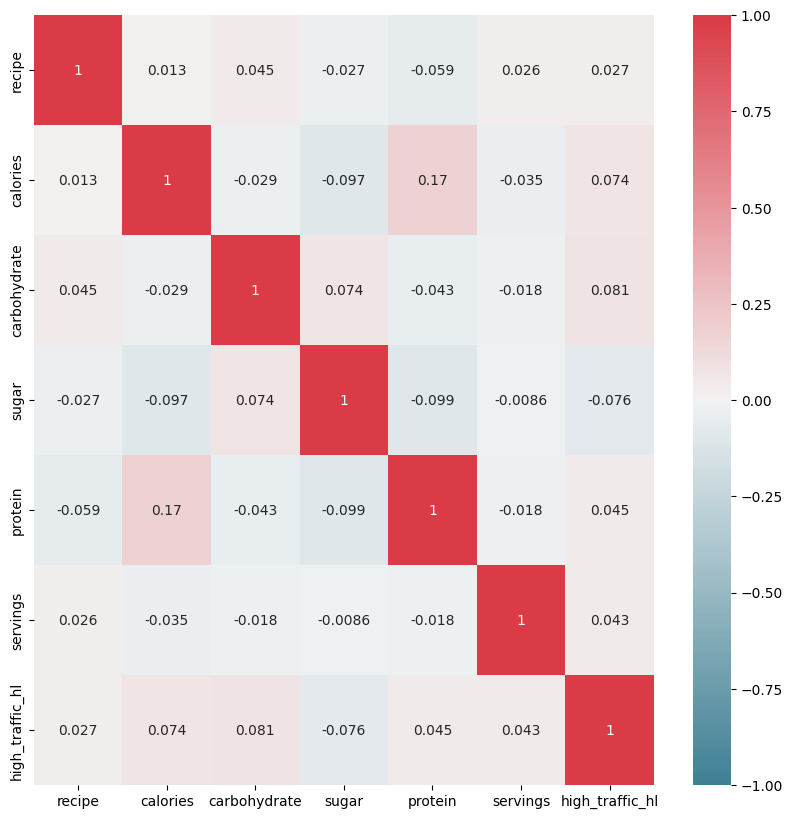

In [825]:
# Create a heatmap of the correlation matrix using Matplotlib
plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap=cmap)
plt.show()

In [826]:
#Model Development
#Import packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [827]:
# Convert categorical variables to numerical
#get dummy
df_dummy = pd.get_dummies(df_cleaned, columns=["category"], drop_first=True)

df_dummy

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic_hl,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
1,2,35.48,38.56,0.66,0.92,4.0,1,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1.0,0,1,0,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4.0,1,0,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4.0,0,0,0,0,0,0,0,0,0,0,0
5,6,691.15,3.46,1.65,53.93,2.0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,942,186.21,83.94,1.98,22.40,4.0,1,0,0,1,0,0,0,0,0,0,0
942,943,1161.00,5.31,22.39,44.22,2.0,0,0,0,0,0,1,0,0,0,0,0
944,945,951.74,29.42,3.57,13.87,2.0,1,0,0,0,0,0,0,0,1,0,0
945,946,266.61,35.77,0.97,8.07,6.0,1,0,0,0,0,0,0,0,0,1,0


In [828]:
df_dummy.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'high_traffic_hl', 'category_Breakfast', 'category_Chicken',
       'category_Chicken Breast', 'category_Dessert', 'category_Lunch/Snacks',
       'category_Meat', 'category_One Dish Meal', 'category_Pork',
       'category_Potato', 'category_Vegetable'],
      dtype='object')

In [829]:
#Choose relevant columns
#Define the features and target variable
X = df_dummy.drop(["recipe", 'high_traffic_hl'], axis=1)
y = df_dummy["high_traffic_hl"]

In [830]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=40)

#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (680, 15)
train size y :  (680,)
test size X :  (215, 15)
test size y :  (215,)


In [831]:
#check for distribution of labels
y_train.value_counts(normalize=True)

1    0.602941
0    0.397059
Name: high_traffic_hl, dtype: float64

In [832]:
# Set up our K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=43)

In [833]:
# Define the models
# Fit the models on the training data
# Train a Logistic Regression model
logistic_regression = LogisticRegression(random_state=40)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [834]:
# Evaluate the logistic regression model on the test set
log_reg_pred = logistic_regression.predict(X_test)

In [835]:
# Create the classification report for the logistic regression model
class_rep_log_reg = classification_report(y_test, log_reg_pred)

print("Logistic Regression: \n", class_rep_log_reg)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73        90
           1       0.80      0.79      0.80       125

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [836]:
# Train a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [837]:
# Evaluate the decision tree model on the test set
tree_pred = decision_tree.predict(X_test)

In [838]:
# Create the classification report for the decision tree model
class_rep_tree = classification_report(y_test, tree_pred)

print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

           0       0.62      0.64      0.63        90
           1       0.74      0.71      0.72       125

    accuracy                           0.68       215
   macro avg       0.68      0.68      0.68       215
weighted avg       0.69      0.68      0.68       215



In [839]:
# Train a Random Forest model
random_forest = RandomForestClassifier(random_state=40)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [840]:
# Evaluate the decision tree model on the test set
forest_pred = random_forest.predict(X_test)

In [841]:
# Create the classification report for the random forest model
class_rep_forest = classification_report(y_test, forest_pred)

print("Random Forest: \n", class_rep_forest)

Random Forest: 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65        90
           1       0.75      0.78      0.76       125

    accuracy                           0.72       215
   macro avg       0.71      0.70      0.71       215
weighted avg       0.71      0.72      0.72       215



In [842]:
# Train a Support Vector Machine model
svm = SVC(random_state=40)
svm.fit(X_train, y_train)

SVC(random_state=40)

In [843]:
# Evaluate the svm model on the test set
svm_pred = svm.predict(X_test)

In [844]:
# Create the classification report for the svm model
class_rep_svm = classification_report(y_test, svm_pred)

print("Support Vector Model: \n", class_rep_svm)

Support Vector Model: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.58      1.00      0.74       125

    accuracy                           0.58       215
   macro avg       0.29      0.50      0.37       215
weighted avg       0.34      0.58      0.43       215



In [845]:
# Train a Neural Network model
nn = MLPClassifier(random_state=40)
nn.fit(X_train, y_train)

MLPClassifier(random_state=40)

In [846]:
nn_pred = nn.predict(X_test)

In [847]:
class_rep_nn = classification_report(y_test, nn_pred)

print("Neural Network: \n", class_rep_nn)

Neural Network: 
               precision    recall  f1-score   support

           0       0.67      0.33      0.44        90
           1       0.65      0.88      0.75       125

    accuracy                           0.65       215
   macro avg       0.66      0.61      0.60       215
weighted avg       0.66      0.65      0.62       215



In [848]:
#performing GridSearchCV to improve the model's ability to predict traffic for recipes on website
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [849]:
#Hyperparameters
# Define the grid of values for tol and max_iter
tol = [0.0001, 0.1, 1]
max_iter = [7]
penalty = [None, 'l1', 'l2', 'elasticnet']
C = [0.6]
solver = ['liblinear', 'sag', 'saga']
multi_class = ['auto']

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid_logit = dict(tol=tol , max_iter=max_iter, penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Instantiate GridSearchCV with the required parameters
grid_model_logit = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_logit, cv=kf, scoring='accuracy')

# Fit grid_model to the data
grid_model_result_logit = grid_model_logit.fit(X_train, y_train)

# Summarize results
logit_best_params = grid_model_result_logit.best_params_
print('Best Parameters: ', logit_best_params)

# Extract the best model and evaluate it on the test set
logit_best_model = grid_model_result_logit.best_estimator_
logit_accuracy_score = logit_best_model.score(X_test, y_test)

print("Accuracy of logistic regression classifier: {:.2f}%".format(logit_accuracy_score * 100))

Best Parameters:  {'C': 0.6, 'max_iter': 7, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Accuracy of logistic regression classifier: 80.47%
